In [24]:
%pip install tf_keras_vis tflite-support-nightly

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tflite-support-nightly (from versions: none)
ERROR: No matching distribution found for tflite-support-nightly


# Create your dataset

1) Choose which classes you would like to add.

2) Create a dataset with your own photos

3) Separate your dataset into train and test subsets.

In [230]:
from bing_image_downloader import downloader

QUERIES = ["cat"]
OUTPUT_DIR = 'dataset_images'
NB_IMAGES = 60

for query in QUERIES:
    downloader.download(
        query, NB_IMAGES, OUTPUT_DIR,
        adult_filter_off=False, force_replace=False, timeout=15
    )



[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://get.pxhere.com/photo/sweet-cute-fur-cat-brown-mammal-fauna-blue-eye-close-up-whiskers-beige-vertebrate-mieze-burmese-british-shorthair-small-to-medium-sized-cats-cat-like-mammal-carnivoran-domestic-short-haired-cat-domestic-long-haired-cat-british-semi-longhair-birman-728026.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://upload.wikimedia.org/wikipedia/commons/d/d4/Cat_March_2010-1a.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://img2.goodfon.com/wallpaper/nbig/1/e9/cat-kot-koshka-trava-chernyy.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.dailypaws.com/thmb/zkj_uOautVbCjvIJGUaCBGJRFp0=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/scottish-fold-closeup-profile-outside-87234226-822d449d0731417a8818e3721374d1e5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.pexels.com/photos/1359302/pexels-photo-1359

In [231]:
import os
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split


def create_dataframe_from_directories(path):
    data = []

    for label_dir in os.listdir(path):
        if os.path.isfile(label_dir):
            continue

        label_path_path = os.path.join(path, label_dir)
        for file in os.listdir(label_path_path):
            data.append([os.path.join(label_path_path, file), label_dir])
        
    return pd.DataFrame(data, columns = ["path", "label"])

In [232]:
df = create_dataframe_from_directories("dataset_images")
labels = df['label']
df.head()


path label
0   dataset_images\cat\Image_1.jpg   cat
1  dataset_images\cat\Image_10.jpg   cat
2  dataset_images\cat\Image_11.jpg   cat
3  dataset_images\cat\Image_12.jpg   cat
4  dataset_images\cat\Image_13.jpg   cat

**TODO**: Display some images of your dataset

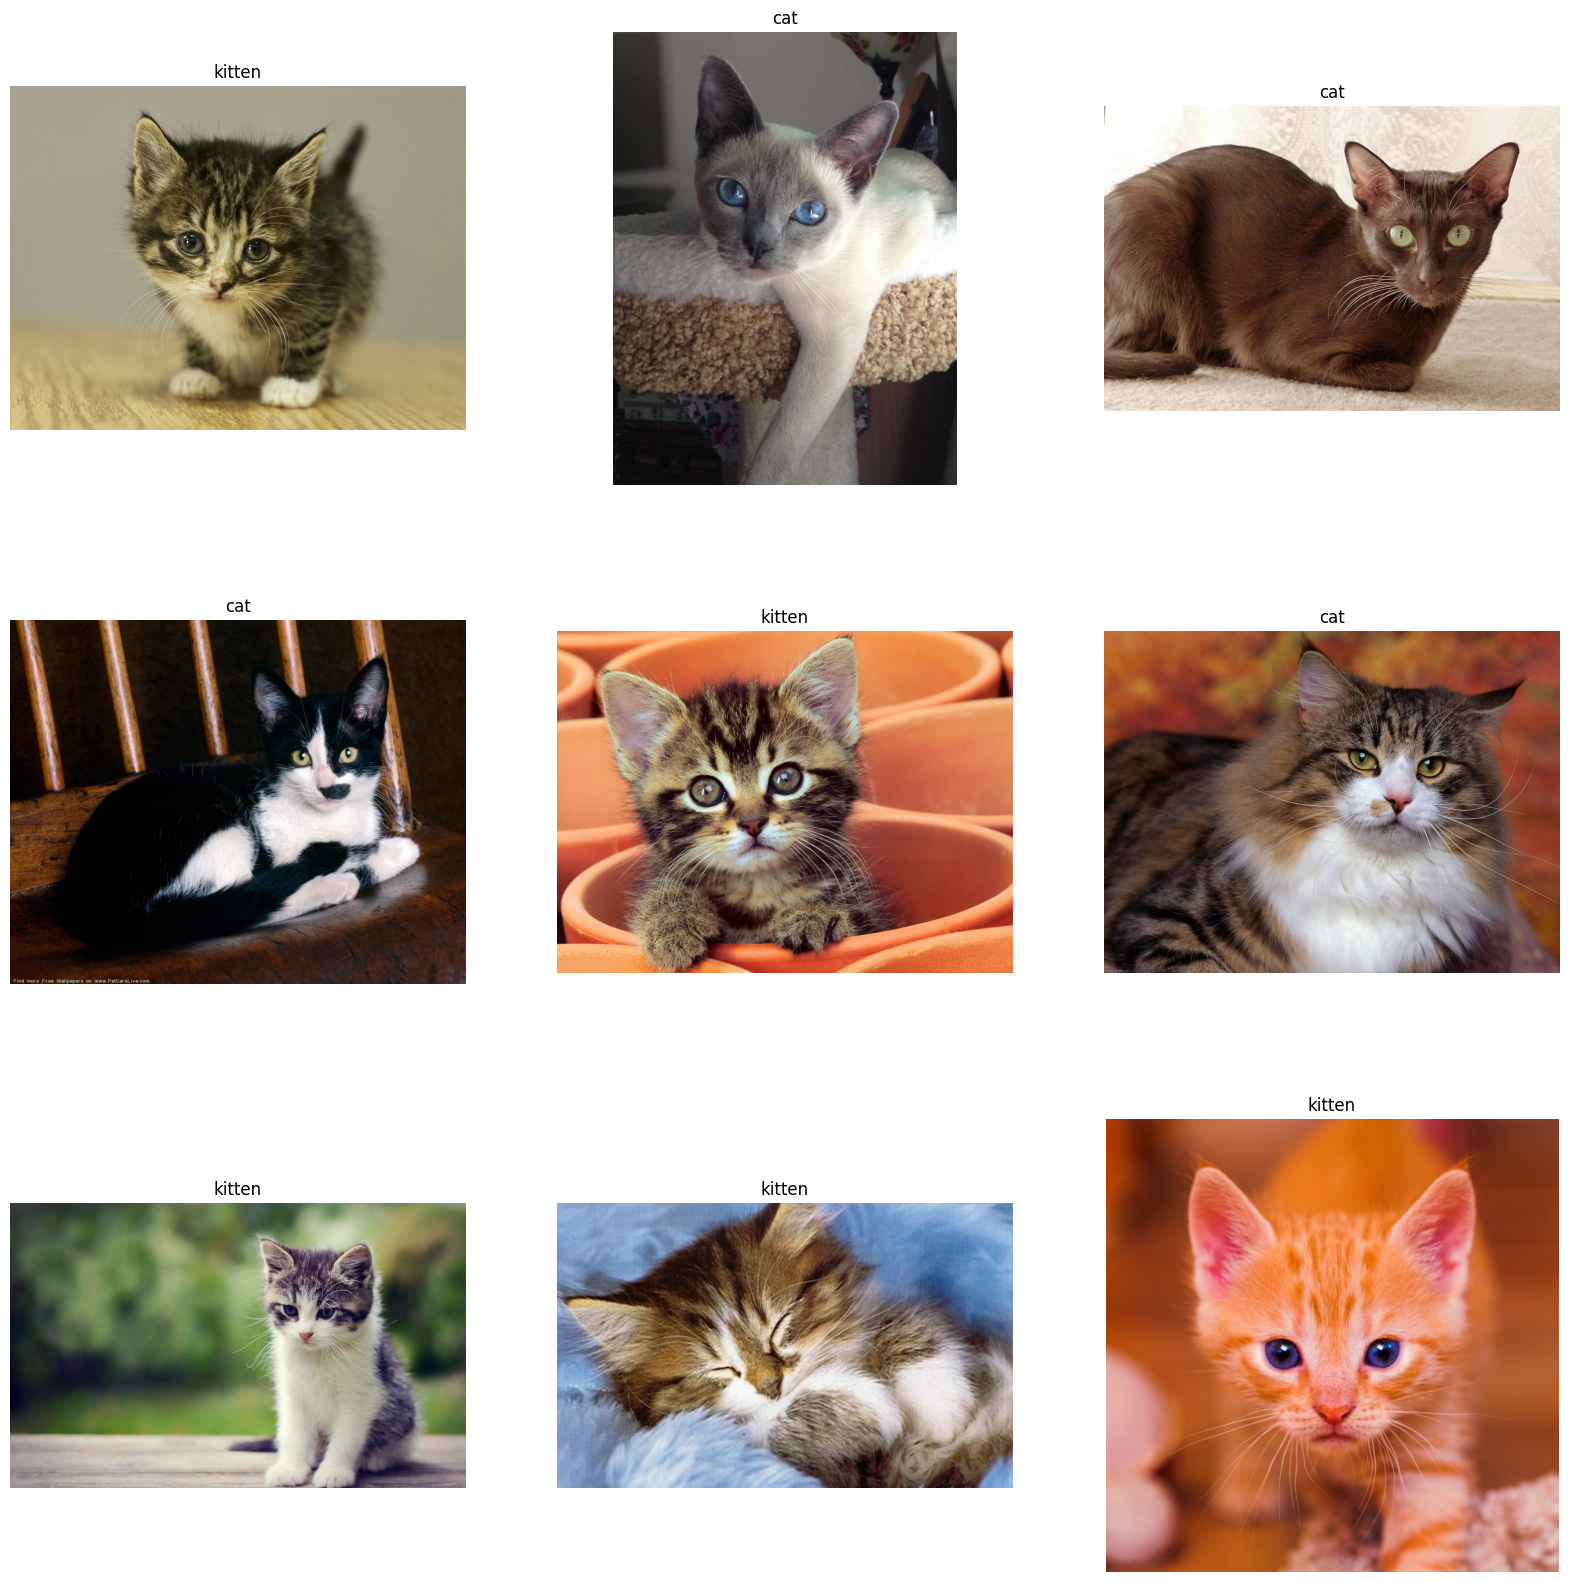

In [233]:
import matplotlib.pyplot as plt
import PIL
import PIL.Image
 
plt.figure(figsize=(20, 20))

i = 0
for _, rowdata in df.sample(frac=1).head(9).iterrows():
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(rowdata.path))
    plt.title(rowdata.label)
    plt.axis("off")
    i += 1

In [234]:
trainset, testset, train_labels, test_labels = train_test_split(df, labels, test_size=0.2, random_state=42)

# Explore your dataset

**TODO**: count the number of examples per classes and plot an histogram of it

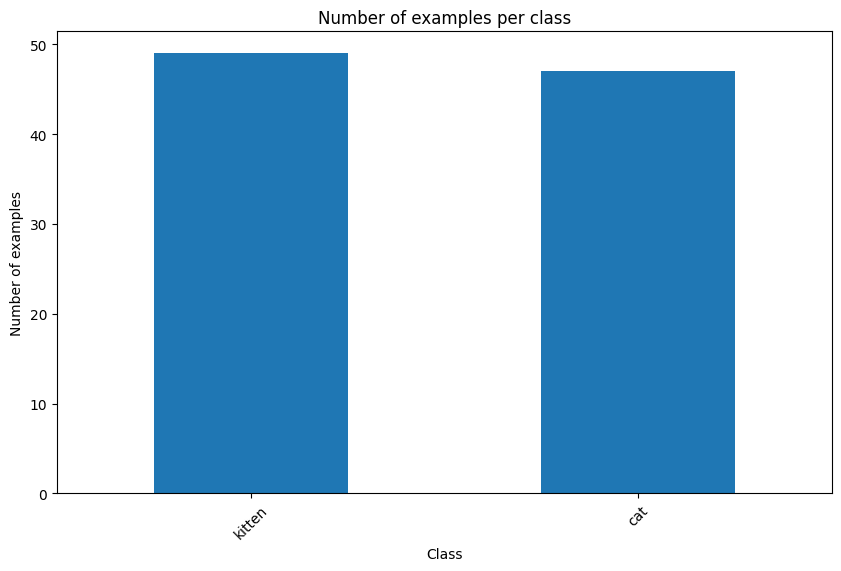

In [235]:
import matplotlib.pyplot as plt

# Count the number of examples per class
label_counts = trainset['label'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Number of examples per class')
plt.xlabel('Class')
plt.ylabel('Number of examples')
plt.xticks(rotation=45)
plt.show()


# Preprocessing steps

In [236]:
from tensorflow.keras.layers import (
    Resizing, Rescaling, RandomFlip, RandomRotation, RandomZoom
)
import tensorflow as tf

from tensorflow.keras import Sequential

IMG_HEIGHT = 224
IMG_WIDTH = 224

image_preprocesses = Sequential([
    Resizing(IMG_HEIGHT, IMG_WIDTH, crop_to_aspect_ratio=True),
    Rescaling(1. / 255)
])

image_augmentations = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    # TODO: choose some image augmentations layers
    # see which keras layers you can use
    # The kind of layers you will want to use starts with "Random".
    # See the following page for more information on data augmentation :
    # https://www.tensorflow.org/tutorials/images/data_augmentation
])

def open_images(paths):
    return np.stack([
        open_image(path) for path in paths
    ])

def open_image(path):
    with PIL.Image.open(path) as image:
        #opened_img = image_preprocesses(np.asarray(image))
        # Check the number of channels in the image
        if len(np.asarray(image).shape) == 2:  # Grayscale image
            # Duplicate the single channel to create a three-channel image
            image_rgb = np.stack((np.asarray(image),) * 3, axis=-1)
        else:  # Color image
            # Convert the image to RGB if it's not already in RGB mode
            if image.mode != "RGB":
                image = image.convert("RGB")
            # Convert the RGB image to array
            image_rgb = np.asarray(image)
        # Preprocess the image
        preprocessed_img = image_preprocesses(image_rgb)
        print(preprocessed_img.shape)
    return preprocessed_img
    #return opened_img

def augment_images(images):
    return np.stack([
        image_augmentations(img) for img in images
    ])

In [237]:
import matplotlib.pyplot as plt

def open_images(paths):
    return np.stack([open_image(path) for path in paths])

preprocessed_images = open_images(df['path'].tolist())
augmented_images = augment_images(preprocessed_images)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


C:\Users\Julien\miniconda3\envs\ARN\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

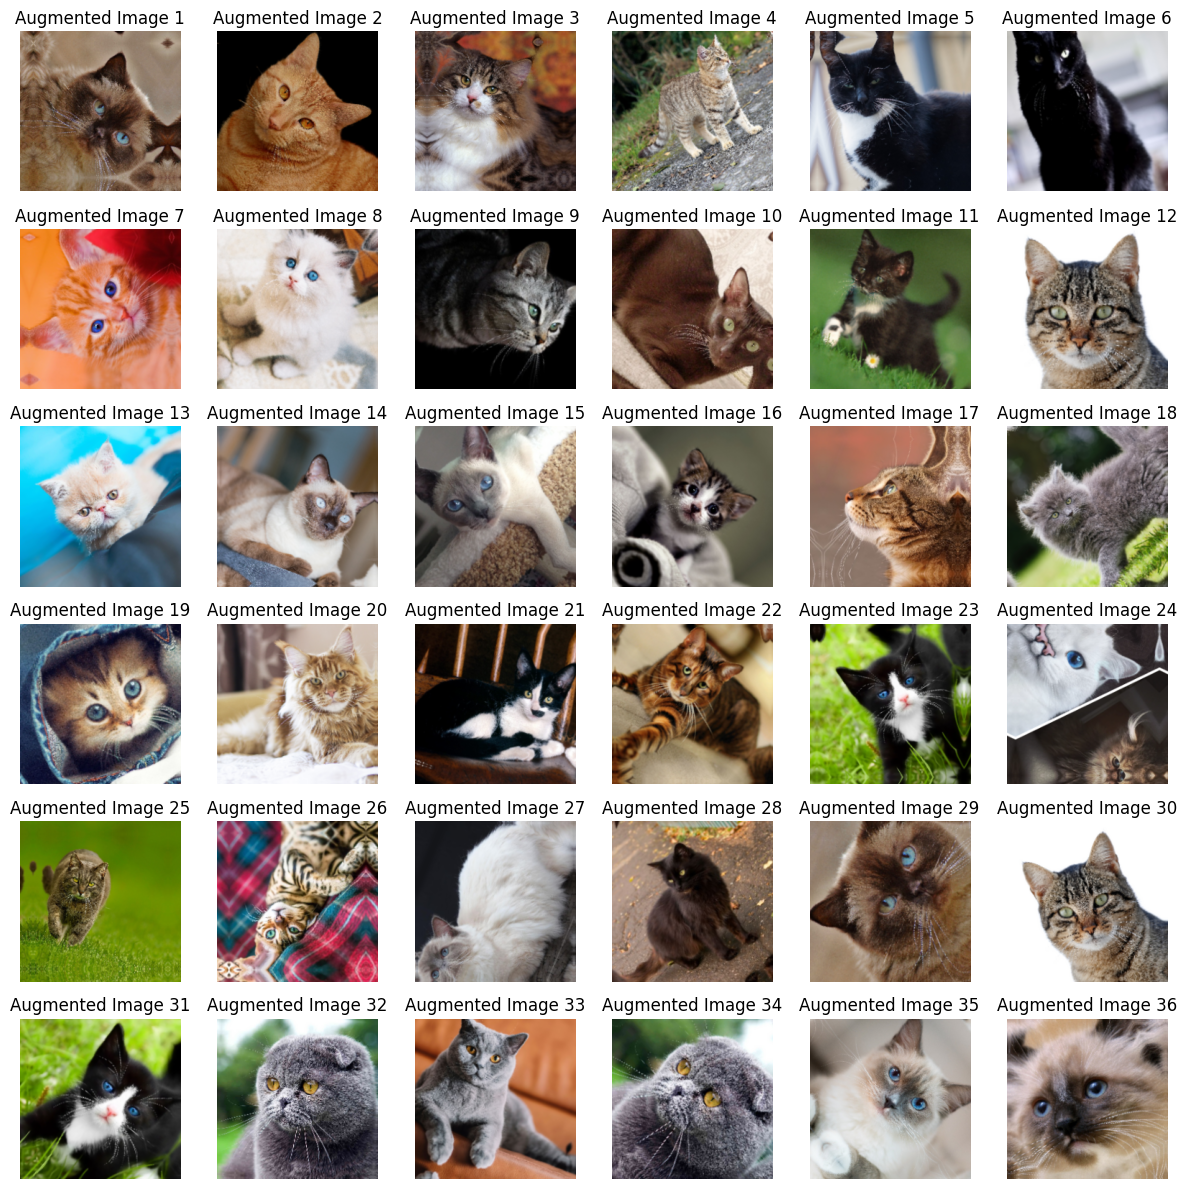

In [238]:
def augment_images(images, num_samples=5):
    augmented_images = np.stack([image_augmentations(img) for img in images])
    return augmented_images[:num_samples]


num_rows = 6
num_cols = 6
total_images = num_rows * num_cols

augmented_images_subset = augment_images(preprocessed_images, num_samples=total_images)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()
for i in range(total_images):
    axes[i].imshow(augmented_images_subset[i])
    axes[i].set_title(f"Augmented Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**TODO**: plot examples of preprocessed and augmented images

## Define model

In [239]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    Dropout
)

def get_model():
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    )
    
    layers = base_model.output

    added_layers = [
        # important, we need global average pooling instead of flatten for class activation map later on 
        # Use GlobalAveragePooling2D instead of Flatten for class activation map later on
        GlobalAveragePooling2D(), 
        # Add a dense layer with 128 units and ReLU activation
        Dense(128, activation='relu'),
        # Add the final output layer with softmax activation for classification
        Dense(NUM_CLASSES, activation='softmax')]
        # TODO: ...
    

    model = Model(inputs=base_model.input, outputs=Sequential(added_layers)(layers))

    # TODO: freeze layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(
      optimizer = RMSprop(),
      loss = SparseCategoricalCrossentropy(),
      metrics = ['acc']
    )
        
    return model

In [241]:
get_model().summary()

NameError: name 'NUM_CLASSES' is not defined

# Model training

**TODO**: cross-validate your model, you can base yourself on the code from the first part of this practical work

**NOTE**: you shouldn't augment validations images. What we want to evaluate is the performances on "real" images, not on images that are augmented and change all the time 

# Results

**TODO**: plot the results from your crossvalidation

## Evaluate model on test set

**TODO**: when you've selected a final model, evaluate its performances (f-score, confusion matrix, ...) on your test set

### Display some misclassified images

**TODO**: display some misclassified images to be able to see what images are difficult for the model

## Use grad-cam to inspect how the model classify
Here we can see an heatmap of the regions that activates the model the most.

### For more information:
- tf-keras-vis documentation: https://keisen.github.io/tf-keras-vis-docs/
- Grad-cam paper: https://arxiv.org/pdf/1610.02391.pdf
- Grad-cam++ paper: https://arxiv.org/pdf/1710.11063.pdf

**NOTE**: maybe you will need to adapt some variable names based on your code above. For example, _model_ should be the model trained on all the training data. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from tensorflow.keras.applications import MobileNetV2
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

# Create GradCAM++ object
gradcam = GradcamPlusPlus(
    model,
    model_modifier=ReplaceToLinear(),
    clone=True,
)

nb_images_per_class = 10

fig, axs = plt.subplots(nb_images_per_class, len(LABEL_NAMES), figsize=(len(LABEL_NAMES) * 5, nb_images_per_class * 5))

for label_idx, label_name in enumerate(LABEL_NAMES):
    axs[0,label_idx].set_title(label_name, loc='center', y=1.1)
    
    i = 0
    for _, rowdata in train_df[train_df['label'] == label_name].sample(frac=1).head(nb_images_per_class).iterrows():
        img = open_image(rowdata.path)    
        pred = model(np.expand_dims(img, axis=0))

        # Generate cam with GradCAM++
        score = CategoricalScore(np.argmax(pred))
        cam = gradcam(score, img)
        heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

        axs[i,label_idx].imshow(img, vmin=0, vmax=1)
        axs[i,label_idx].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
        axs[i,label_idx].axis("off")

        i += 1

### Grad-cam on misclassified images

**TODO**: now do the same than above, but with the misclassified images. You shouldn't change anything pertaining to grad-cam besides on which image and prediction you do it

**TODO**: try to determine what caused the misclassifcations and what you can do about it